# 📝 Data Preprocessing

---

## 📌 1️. Introduction
This notebook preprocesses the **Students' Academic Performance** dataset by:

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
file_path = "xAPI-Edu-Data.csv"

# Load CSV into a Pandas DataFrame
df = pd.read_csv(file_path)

print(df.head())  # Show first 5 rows

  gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        F   Father           15                16                  2   
1        F   Father           20                20                  3   
2        F   Father           10                 7                  0   
3        F   Father           30                25                  5   
4        F   Father           40                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          20                   Yes                     Go

In [40]:
print(df.info())  # Show data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

## 📌 2️. Checking for Duplicates 🔍
Duplicate rows can lead to biased analysis, but in this dataset, some records appear similar **because they represent the same student in different semesters**.

After reviewing the duplicate rows, they were **not removed** since they contain different values for:
- **Semester** (`F` vs. `S`)
- **raisedhands**
- **VisITedResources**
- **AnnouncementsView**
- **Discussion**

These differences indicate that the dataset is **tracking student activities separately for each semester** rather than repeating identical data.

**🟢 Conclusion:**
- **Number of duplicate rows found:** `2`
- **Action taken:** **Kept** all records, as they represent different semester data.
- **Next step:** Use the **Semester column** in future analysis to differentiate between performance in different terms.

In [41]:
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

if not duplicate_rows.empty:
    print("Displaying some duplicate rows:")
    print(duplicate_rows.head(10))

Number of duplicate rows: 2
Displaying some duplicate rows:
    gender NationalITy PlaceofBirth     StageID GradeID SectionID   Topic  \
326      M      Jordan       Jordan  lowerlevel    G-02         A  French   
327      M      Jordan       Jordan  lowerlevel    G-02         A  French   

    Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
326        F   Father           10                15                 10   
327        S   Father           30                10                 20   

     Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
326          21                    No                      Bad   
327           5                    No                      Bad   

    StudentAbsenceDays Class  
326            Above-7     L  
327            Above-7     L  


## 📌 3️. Handling Missing Values ❌
Missing values can negatively impact analysis and machine learning models. Therefore, it's important to check for any missing values in the dataset.

After performing a missing value check, **no missing values were found** in any column.

| Column Name                | Missing Values |
|----------------------------|---------------|
| gender                     | **0**         |
| NationalITy                | **0**         |
| PlaceofBirth               | **0**         |
| StageID                    | **0**         |
| GradeID                    | **0**         |
| SectionID                  | **0**         |
| Topic                      | **0**         |
| Semester                   | **0**         |
| Relation                   | **0**         |
| raisedhands                | **0**         |
| VisITedResources           | **0**         |
| AnnouncementsView          | **0**         |
| Discussion                 | **0**         |
| ParentAnsweringSurvey      | **0**         |
| ParentschoolSatisfaction   | **0**         |
| StudentAbsenceDays         | **0**         |
| Class                      | **0**         |

### 🟢 **Conclusion:**
- **No missing values detected** ✅
- **No imputation or data cleaning was needed** for missing values.

In [42]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


## 📌 4️. Standardizing Categorical Columns 🔄
To maintain consistency, categorical values were converted to lowercase and trimmed.

| **Column Name**    | **Original Values**           | **Standardized Values**  |
|--------------------|------------------------------|--------------------------|
| `NationalITy`     | `"kw", "kuwalt", "lebanon"`   | `"kuwait", "lebanon"`   |
| `StageID`         | `"lowerlevel", "middleschool"` | `"lower_school", "middle_school"` |

**🟢 Conclusion:**
- Inconsistent values were **standardized** to improve data quality.

In [43]:
categorical_columns = [
    "gender", "NationalITy", "PlaceofBirth", "StageID", "GradeID",
    "SectionID", "Topic", "Semester", "Relation",
    "ParentAnsweringSurvey", "ParentschoolSatisfaction",
    "StudentAbsenceDays", "Class"
]

df[categorical_columns] = df[categorical_columns].apply(lambda x: x.str.lower().str.strip())

print(df.head())  # Show preview after transformation

  gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      m          kw       kuwait  lowerlevel    g-04         a    it   
1      m          kw       kuwait  lowerlevel    g-04         a    it   
2      m          kw       kuwait  lowerlevel    g-04         a    it   
3      m          kw       kuwait  lowerlevel    g-04         a    it   
4      m          kw       kuwait  lowerlevel    g-04         a    it   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        f   father           15                16                  2   
1        f   father           20                20                  3   
2        f   father           10                 7                  0   
3        f   father           30                25                  5   
4        f   father           40                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          20                   yes                     go

## 📌 5️. Encoding Categorical Variables 🔢
Machine learning models prefer numerical data. Below is the encoding applied:

| **Column Name**              | **Original Values**       | **Converted To**        |
|------------------------------|--------------------------|-------------------------|
| **StudentAbsenceDays**       | `"low", "high"`          | `0 = low, 1 = high`     |
| **Semester**                 | `"F", "S"`               | `1 = F, 2 = S`          |
| **ParentAnsweringSurvey**     | `"yes", "no"`           | `1 = yes, 0 = no`       |
| **ParentschoolSatisfaction** | `"good", "bad"`         | `1 = good, 0 = bad`     |
| **Class**                    | `"h", "m", "l"`         | `2 = h, 1 = m, 0 = l`   |

**🟢 Conclusion:**
- Categorical values were successfully **converted to numerical values** for better machine learning performance.

In [44]:
df["NationalITy"] = df["NationalITy"].replace({"kw": "kuwait", "lebanon": "lebanon"})
df["PlaceofBirth"] = df["PlaceofBirth"].replace({"kuwait": "kuwait"})
df["StageID"] = df["StageID"].replace({"lowerlevel": "lower_school", "middleschool": "middle_school"})

print(df["NationalITy"].value_counts())  # Check standardized values

NationalITy
kuwait         179
jordan         172
palestine       28
iraq            22
lebanon         17
tunis           12
saudiarabia     11
egypt            9
syria            7
usa              6
iran             6
lybia            6
morocco          4
venzuela         1
Name: count, dtype: int64


In [45]:
binary_columns = ["ParentAnsweringSurvey", "ParentschoolSatisfaction"]

df[binary_columns] = df[binary_columns].replace({"yes": 1, "no": 0, "good": 1, "bad": 0})

print(df[binary_columns].head())

   ParentAnsweringSurvey  ParentschoolSatisfaction
0                      1                         1
1                      1                         1
2                      0                         0
3                      0                         0
4                      0                         0


<ipython-input-45-0d4313408422>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace({"yes": 1, "no": 0, "good": 1, "bad": 0})


In [46]:
df["StudentAbsenceDays"] = df["StudentAbsenceDays"].replace({"under-7": "low", "above-7": "high"})

df["Class"] = df["Class"].replace({"h": 2, "m": 1, "l": 0})

print(df[["StudentAbsenceDays", "Class"]].head())

  StudentAbsenceDays  Class
0                low      1
1                low      1
2               high      0
3               high      0
4               high      1


<ipython-input-46-5caa5baaf5c7>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Class"] = df["Class"].replace({"h": 2, "m": 1, "l": 0})


In [47]:
df["StudentAbsenceDays"] = df["StudentAbsenceDays"].replace({"low": 0, "high": 1})
df["Semester"] = df["Semester"].replace({"f": 1, "s": 2})


<ipython-input-47-a18a0b54c15a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["StudentAbsenceDays"] = df["StudentAbsenceDays"].replace({"low": 0, "high": 1})
<ipython-input-47-a18a0b54c15a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Semester"] = df["Semester"].replace({"f": 1, "s": 2})


In [48]:
print(df.head(14))

   gender NationalITy PlaceofBirth        StageID GradeID SectionID Topic  \
0       m      kuwait       kuwait   lower_school    g-04         a    it   
1       m      kuwait       kuwait   lower_school    g-04         a    it   
2       m      kuwait       kuwait   lower_school    g-04         a    it   
3       m      kuwait       kuwait   lower_school    g-04         a    it   
4       m      kuwait       kuwait   lower_school    g-04         a    it   
5       f      kuwait       kuwait   lower_school    g-04         a    it   
6       m      kuwait       kuwait  middle_school    g-07         a  math   
7       m      kuwait       kuwait  middle_school    g-07         a  math   
8       f      kuwait       kuwait  middle_school    g-07         a  math   
9       f      kuwait       kuwait  middle_school    g-07         b    it   
10      m      kuwait       kuwait  middle_school    g-07         a  math   
11      m      kuwait       kuwait  middle_school    g-07         b  math   

In [49]:
output_path = "cleaned_xAPI-Edu-Data.csv"

df.to_csv(output_path, index=False)

print(f"Cleaned data saved to: {output_path}")

Cleaned data saved to: cleaned_xAPI-Edu-Data.csv


In [50]:
file_path = 'cleaned_xAPI-Edu-Data.csv'
df = pd.read_csv(file_path)
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,m,kuwait,kuwait,lower_school,g-04,a,it,1,father,15,16,2,20,1,1,0,1
1,m,kuwait,kuwait,lower_school,g-04,a,it,1,father,20,20,3,25,1,1,0,1
2,m,kuwait,kuwait,lower_school,g-04,a,it,1,father,10,7,0,30,0,0,1,0
3,m,kuwait,kuwait,lower_school,g-04,a,it,1,father,30,25,5,35,0,0,1,0
4,m,kuwait,kuwait,lower_school,g-04,a,it,1,father,40,50,12,50,0,0,1,1


##Encoding remaining categorical features for Correlation Analysis
 For correlation analysis, all remaining categorical features were converted into numerical values.This ensures that relationships between variables can be analyzed effectively.

### **🟢 Conclusion:**
- **Categorical variables were successfully encoded.**
- **Encoded values will now be used in correlation analysis.**

In [51]:
df_encoded = df.copy()

# List of categorical columns that will not be re-encoded
excluded_columns = ["StudentAbsenceDays", "Semester", "ParentAnsweringSurvey", "ParentschoolSatisfaction", "Class"]

# Encode only the remaining categorical columns
for col in df_encoded.select_dtypes(include=['object']).columns:
    if col not in excluded_columns:
        df_encoded[col] = df_encoded[col].astype('category').cat.codes

df_encoded.head()


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,1,1,0,7,1,0,15,16,2,20,1,1,0,1
1,1,4,4,1,1,0,7,1,0,20,20,3,25,1,1,0,1
2,1,4,4,1,1,0,7,1,0,10,7,0,30,0,0,1,0
3,1,4,4,1,1,0,7,1,0,30,25,5,35,0,0,1,0
4,1,4,4,1,1,0,7,1,0,40,50,12,50,0,0,1,1


## Correlation Analysis & Feature Removal
To improve model performance, we analyzed feature correlations and removed highly correlated features.

###Analysis Process
- **Computed correlation matrix** to examine relationships between numerical features.
- **Visualized correlations** using a heatmap.
- **Identified highly correlated features** (correlation threshold > **0.8**) for removal.

###Correlation Heatmap
The heatmap below illustrates the correlation between different numerical features:

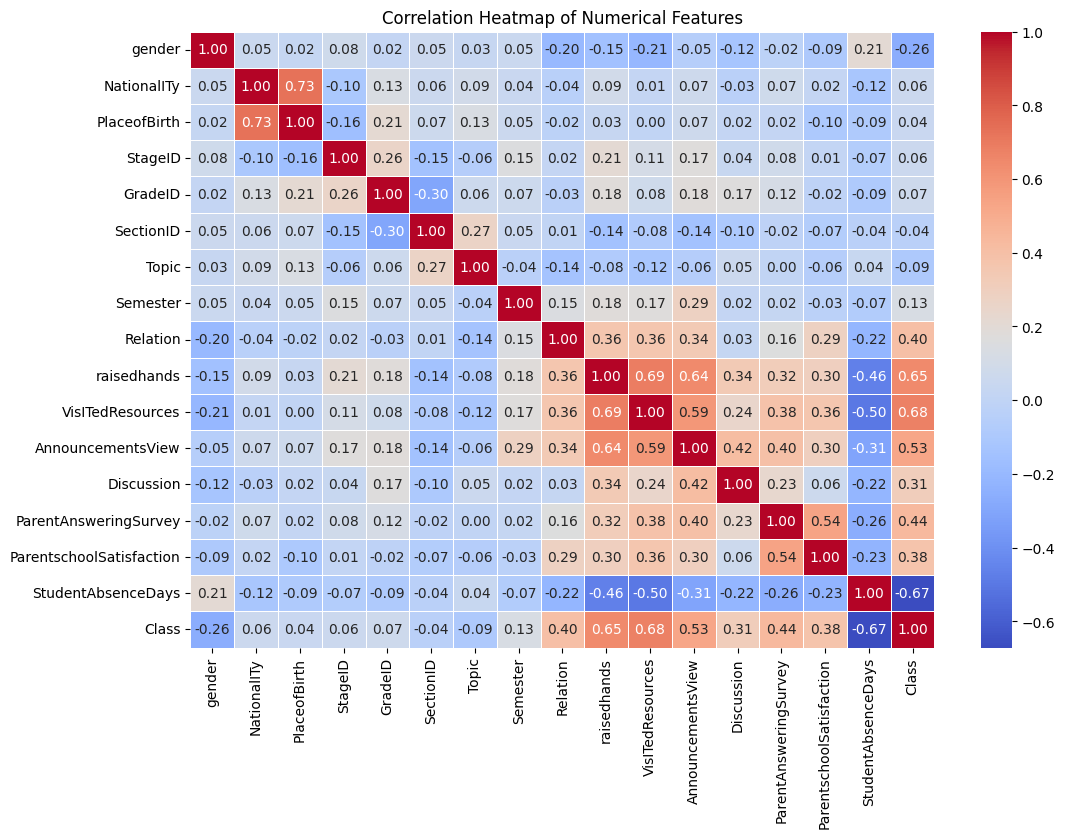

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,m,kuwait,kuwait,lower_school,g-04,a,it,1,father,15,16,2,20,1,1,0,1
1,m,kuwait,kuwait,lower_school,g-04,a,it,1,father,20,20,3,25,1,1,0,1
2,m,kuwait,kuwait,lower_school,g-04,a,it,1,father,10,7,0,30,0,0,1,0
3,m,kuwait,kuwait,lower_school,g-04,a,it,1,father,30,25,5,35,0,0,1,0
4,m,kuwait,kuwait,lower_school,g-04,a,it,1,father,40,50,12,50,0,0,1,1


In [52]:
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Identify highly correlated features
correlated_features = set()
threshold = 0.8
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

df.drop(columns=correlated_features, inplace=True)
df.head()

##Reducing High-Cardinality Categorical Features
High-cardinality categorical features, such as **NationalITy**, can introduce unnecessary complexity in the dataset. To simplify the feature while preserving valuable information, low-frequency categories were grouped together.

### Sample Transformed Data
The dataset now represents frequent nationalities distinctly, while less common ones are combined under `"Other"`:

| NationalITy  |
|-------------|
| Egypt       |
| Jordan      |
| Kuwait      |
| Other       |
| SaudiArabia |

### **🟢 Conclusion:**
- **Reduced the number of unique values** in `NationalITy`, making it more manageable.
- **Preserved key variations** while avoiding sparsity.


In [53]:
nationality_counts = df['NationalITy'].value_counts()
threshold_nationality = 10  # Categories with less than 10 occurrences will be grouped
df['NationalITy'] = df['NationalITy'].apply(
    lambda x: x if nationality_counts[x] >= threshold_nationality else 'Other'
)

##Removing Redundant Categorical Columns
Some categorical columns may not provide significant value for analysis or may introduce redundancy. In this case, **`PlaceofBirth`** was identified as a redundant feature and removed.

###Sample Transformed Data
After removal, the dataset structure remains intact while improving efficiency.

| gender | NationalITy | StageID | GradeID | SectionID | Topic | Semester | Relation | raisedhands | VisITedResources | AnnouncementsView | Discussion | ParentAnsweringSurvey | ParentschoolSatisfaction | StudentAbsenceDays | Class |
|--------|------------|--------|--------|----------|-------|---------|----------|------------|----------------|-----------------|------------|----------------------|-----------------------|----------------|-------|
| 1      | Egypt      | 1      | 1      | 0        | 7     | 1       | 0        | 15         | 16             | 2               | 20         | 1                    | 1                     | 0              | 1     |
| 1      | Jordan     | 1      | 1      | 0        | 7     | 1       | 0        | 20         | 20             | 3               | 25         | 1                    | 1                     | 0              | 1     |
| 1      | Other      | 1      | 1      | 0        | 7     | 1       | 0        | 10         | 7              | 0               | 30         | 0                    | 0                     | 1              | 0     |
| 1      | Kuwait    | 1      | 1      | 0        | 7     | 1       | 0        | 30         | 25             | 5               | 35         | 0                    | 0                     | 1              | 0     |
| 1      | Other     | 1      | 1      | 0        | 7     | 1       | 0        | 40         | 50             | 12              | 50         | 0                    | 0                     | 1              | 1     |

### **🟢 Conclusion:**
- **`PlaceofBirth` was removed** to reduce redundancy.
- **The dataset remains informative and compact.**

In [54]:
df.drop(columns=['PlaceofBirth'], inplace=True)


In [55]:
df.to_csv('reduced_dataset.csv', index=False)